In [1]:
# word2Vecを試す
# 辞書はdic内に

In [2]:
import gensim
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
from pprint import pprint
import csv

import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib import colors
import numpy as np

In [3]:
# モデルの場所 dic下に配置
model_path = 'dic/chive-1.2-mc5_gensim/chive-1.2-mc5.kv'

In [4]:
# model read
wv = gensim.models.KeyedVectors.load(model_path)


In [5]:
# read csv
words=[]
with open('words.csv', 'r', encoding='SHIFT_JIS') as f:
    reader = csv.reader(f)
    for row in reader:
        #print(row[0])
        words.append(row)
        
i = 0
# 1行ごと
all_dict ={}
for row in words:
    i +=1
    my_dict = {}
    print( str(i) + '行目')
    # 行の要素ごと
    for word in row:
        if word!='':
            if i != len(words):# 最後以外の行
                for word_next in words[i]:
                    if word_next!='':
                        # 相関値 計算
                        similarity_score = wv.similarity(word,word_next)
                        # 相関値 保存
                        my_dict[similarity_score] = (word,word_next)
                        all_dict[similarity_score] = (word,word_next)
                        # 相関値 表示
                        #print(word+' , '+word_next+' の相関： '+str(similarity_score))
            else:#最後の行
                print('last row')
            
    # 次の単語グループと一番相関のある単語ペア
    if i!= len(words):
        max_key = max(my_dict.keys())
        max_value = my_dict[max_key]
        print('**  一番強い相関は'+str(my_dict[max_key])+' で相関は '+str(max_key)+'  **')
                

1行目
**  一番強い相関は('WBC', 'BGM') で相関は 0.1699234  **
2行目
**  一番強い相関は('アレンジ', 'レイアウト') で相関は 0.3467664  **
3行目
**  一番強い相関は('画面', '制御') で相関は 0.30462837  **
4行目
**  一番強い相関は('言論', '落書き') で相関は 0.21753722  **
5行目
**  一番強い相関は('テープ', '楽曲') で相関は 0.16668464  **
6行目
**  一番強い相関は('配信', 'イベント') で相関は 0.30481923  **
7行目
**  一番強い相関は('イベント', 'フィギュア') で相関は 0.23578197  **
8行目
**  一番強い相関は('フィギュア', '漫画') で相関は 0.3835644  **
9行目
**  一番強い相関は('漫画', '衣装') で相関は 0.2054728  **
10行目
**  一番強い相関は('衣装', 'ラジオ') で相関は 0.108084574  **
11行目
**  一番強い相関は('ラジオ', '投票') で相関は 0.23879777  **
12行目
**  一番強い相関は('サンリオ', '自動販売機') で相関は 0.21960261  **
13行目
**  一番強い相関は('自動販売機', 'サービスエリア') で相関は 0.4183163  **
14行目
**  一番強い相関は('ハイウェイオアシス', 'VR') で相関は 0.20470831  **
15行目
**  一番強い相関は('VR', 'PC') で相関は 0.26750565  **
16行目
**  一番強い相関は('創作', '思い出') で相関は 0.19047081  **
17行目
**  一番強い相関は('デート', 'ギャル') で相関は 0.28956658  **
18行目
**  一番強い相関は('予定', '周年') で相関は 0.3260869  **
19行目
last row


In [6]:
# 単語のリストを作成
word_list = []
for x in all_dict:
    word_list.append(all_dict[x][0])
    word_list.append(all_dict[x][1])
word_list = list(set(word_list))

# 相関行列の作成
corr_matrix = np.zeros((len(word_list), len(word_list)))
for x in all_dict:
    i = word_list.index(all_dict[x][0])
    j = word_list.index(all_dict[x][1])
    corr_matrix[i][j] = corr_matrix[j][i] = x

last row


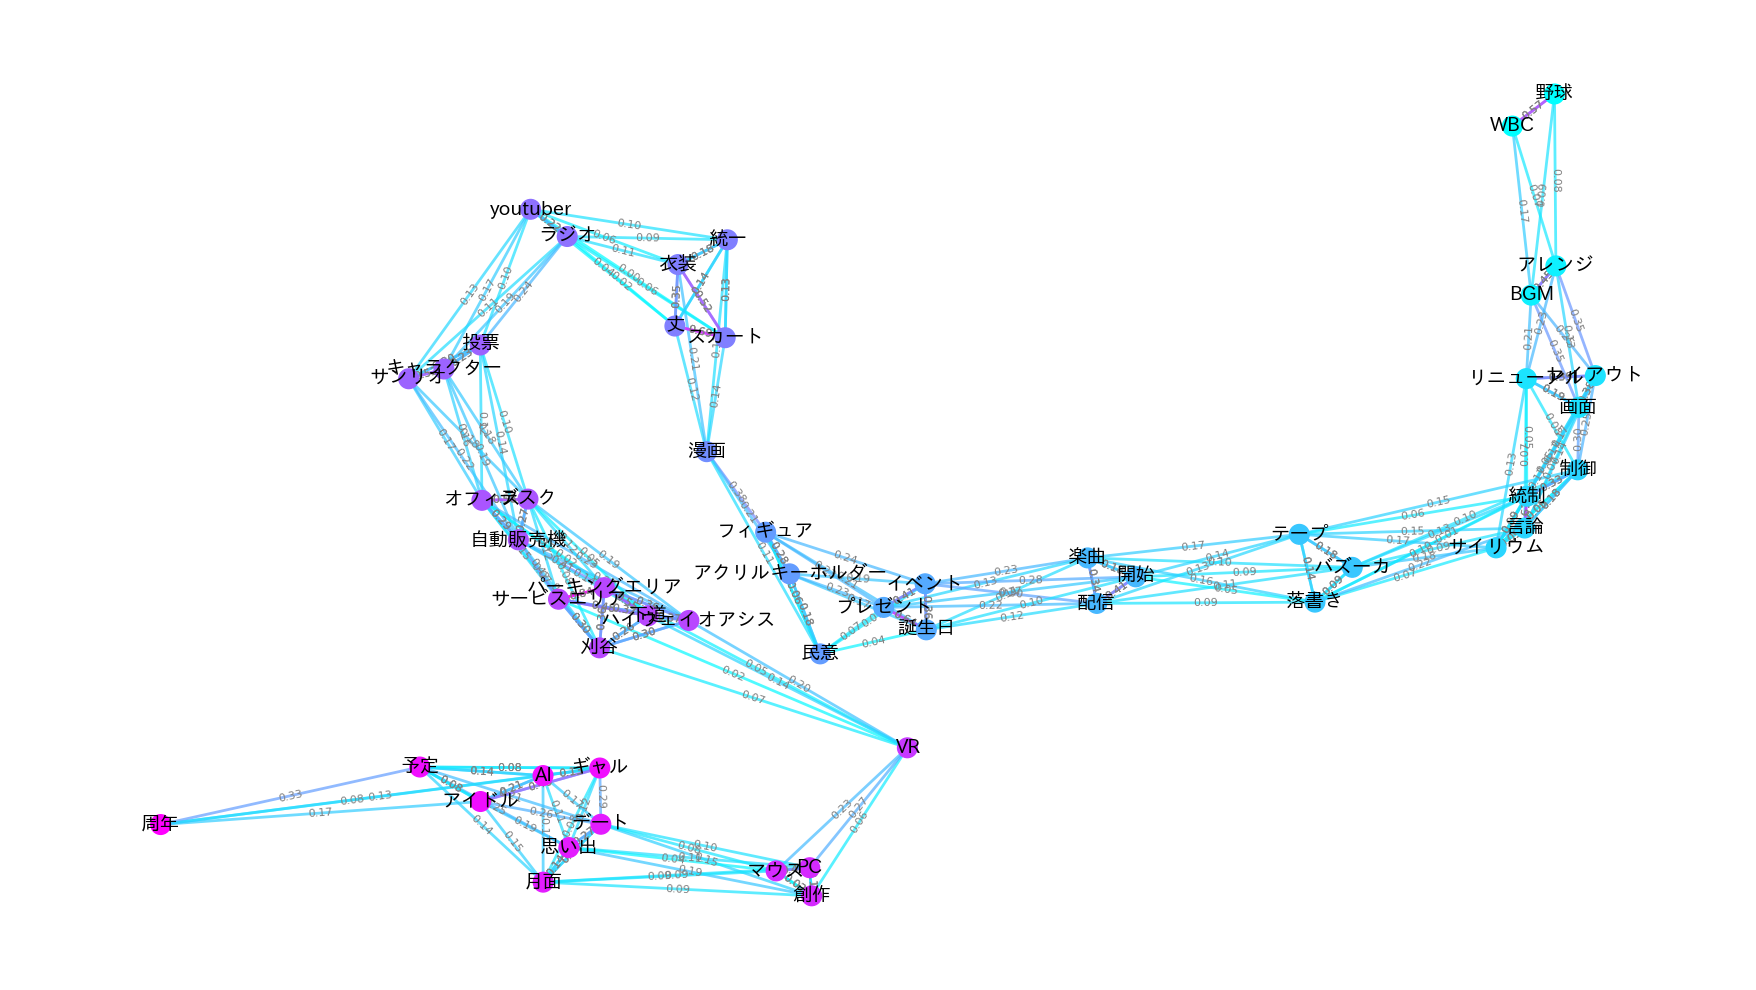

[(0.0, 1.0, 1.0, 1.0), (0.0, 1.0, 1.0, 1.0), (0.054901960784313725, 0.9450980392156862, 1.0, 1.0), (0.054901960784313725, 0.9450980392156862, 1.0, 1.0), (0.10980392156862745, 0.8901960784313725, 1.0, 1.0), (0.10980392156862745, 0.8901960784313725, 1.0, 1.0), (0.10980392156862745, 0.8901960784313725, 1.0, 1.0), (0.16470588235294117, 0.8352941176470589, 1.0, 1.0), (0.16470588235294117, 0.8352941176470589, 1.0, 1.0), (0.16470588235294117, 0.8352941176470589, 1.0, 1.0), (0.16470588235294117, 0.8352941176470589, 1.0, 1.0), (0.2196078431372549, 0.7803921568627451, 1.0, 1.0), (0.2196078431372549, 0.7803921568627451, 1.0, 1.0), (0.2196078431372549, 0.7803921568627451, 1.0, 1.0), (0.2784313725490196, 0.7215686274509804, 1.0, 1.0), (0.2784313725490196, 0.7215686274509804, 1.0, 1.0), (0.2784313725490196, 0.7215686274509804, 1.0, 1.0), (0.3333333333333333, 0.6666666666666667, 1.0, 1.0), (0.3333333333333333, 0.6666666666666667, 1.0, 1.0), (0.3333333333333333, 0.6666666666666667, 1.0, 1.0), (0.38823

In [109]:
# NetworkXのグラフオブジェクトを作成する
G = nx.DiGraph()

# グラフにノードを追加する
#for i in range(len(word_list)):
 #   G.add_node(word_list[i])

i=0
node_colors = []
L = []
# グラフにエッジを追加する
for row in words:
    i +=1
    my_dict = {}
    #print( str(i) + '行目')
    # 行の要素ごと
    j = 0
    for word in row:
        j +=1
        if word!='':
            #print(word)
            G.add_node(word)
            #L.append(word)
            node_colors.append(i-1)
            if i != len(words):# 最後以外の行
                # 同話題内の単語との相関計算
                for word_same in row:
                    if word_same!='':
                        if word_same!=word:
                            G.add_edge(word, word_same, weight=wv.similarity(word,word_same))
                # 次の話題の単語との相関計算
                for word_next in words[i]:
                    if word_next!='':
                        #print(word+ '   ' +word_next +'  ' +str( wv.similarity(word,word_next) ))
                        G.add_edge(word, word_next, weight=wv.similarity(word,word_next))
            else:#最後の行
                print('last row')


node_colors = [x / max(node_colors) for x in node_colors]


#for i in range(len(word_list)):
#    for j in range(i+1, len(word_list)):
#        if corr_matrix[i][j] != 0:
#            G.add_edge(word_list[i], word_list[j], weight=corr_matrix[i][j])

# ウェイトの最大値取得
max_weight = max([edge[2]["weight"] for edge in G.edges(data=True)])
# カラーマップ生成
colmap = "cool"
cmap = plt.get_cmap(colmap)
node_circular_list = [cmap(color) for color in node_colors]
# 重みの最大値を取得する
max_weight = max([edge[2]["weight"] for edge in G.edges(data=True)])
edge_color_list = [cmap(edge[2]["weight"]/max_weight) for edge in G.edges(data=True)]

# グラフを描画する
plt.figure(figsize=(16*1.4, 9*1.4))
#pos = nx.spring_layout(G, weight='weight')

#pos[words[0][0]] = (0,0)
# レイアウトアルゴリズムによる座標の計算
#pos.update(nx.spring_layout(G))
pos = nx.spring_layout(G, weight='weight')
#print(pos)
nx.draw_networkx_nodes(G, pos, node_size=200, node_color=node_color_list, cmap=plt.get_cmap(colmap) )
nx.draw_networkx_labels(G, pos, font_size=14, font_family="IPAexGothic")
#labels = nx.get_edge_attributes(G, "weight")
edges = G.edges(data=True)

nx.draw_networkx_edges(G, pos, edgelist=edges, edge_color=edge_color_list, width=2, alpha=0.7, arrows=False)
labels = {(u, v): format(d['weight'], '.2f') for u, v, d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels,font_color='gray', font_size=8,bbox=dict(facecolor='none',edgecolor='none', alpha=1))

plt.axis("off")
plt.savefig('all_edge.png')
plt.show()

print(node_color_list)

**  一番強い相関は('WBC', 'BGM') で相関は 0.1699234  **
**  一番強い相関は('アレンジ', 'レイアウト') で相関は 0.3467664  **
**  一番強い相関は('画面', '制御') で相関は 0.30462837  **
**  一番強い相関は('言論', '落書き') で相関は 0.21753722  **
**  一番強い相関は('テープ', '楽曲') で相関は 0.16668464  **
**  一番強い相関は('配信', 'イベント') で相関は 0.30481923  **
**  一番強い相関は('イベント', 'フィギュア') で相関は 0.23578197  **
**  一番強い相関は('フィギュア', '漫画') で相関は 0.3835644  **
**  一番強い相関は('漫画', '衣装') で相関は 0.2054728  **
**  一番強い相関は('衣装', 'ラジオ') で相関は 0.108084574  **
**  一番強い相関は('ラジオ', '投票') で相関は 0.23879777  **
**  一番強い相関は('サンリオ', '自動販売機') で相関は 0.21960261  **
**  一番強い相関は('自動販売機', 'サービスエリア') で相関は 0.4183163  **
**  一番強い相関は('ハイウェイオアシス', 'VR') で相関は 0.20470831  **
**  一番強い相関は('VR', 'PC') で相関は 0.26750565  **
**  一番強い相関は('創作', '思い出') で相関は 0.19047081  **
**  一番強い相関は('デート', 'ギャル') で相関は 0.28956658  **
**  一番強い相関は('予定', '周年') で相関は 0.3260869  **
last row


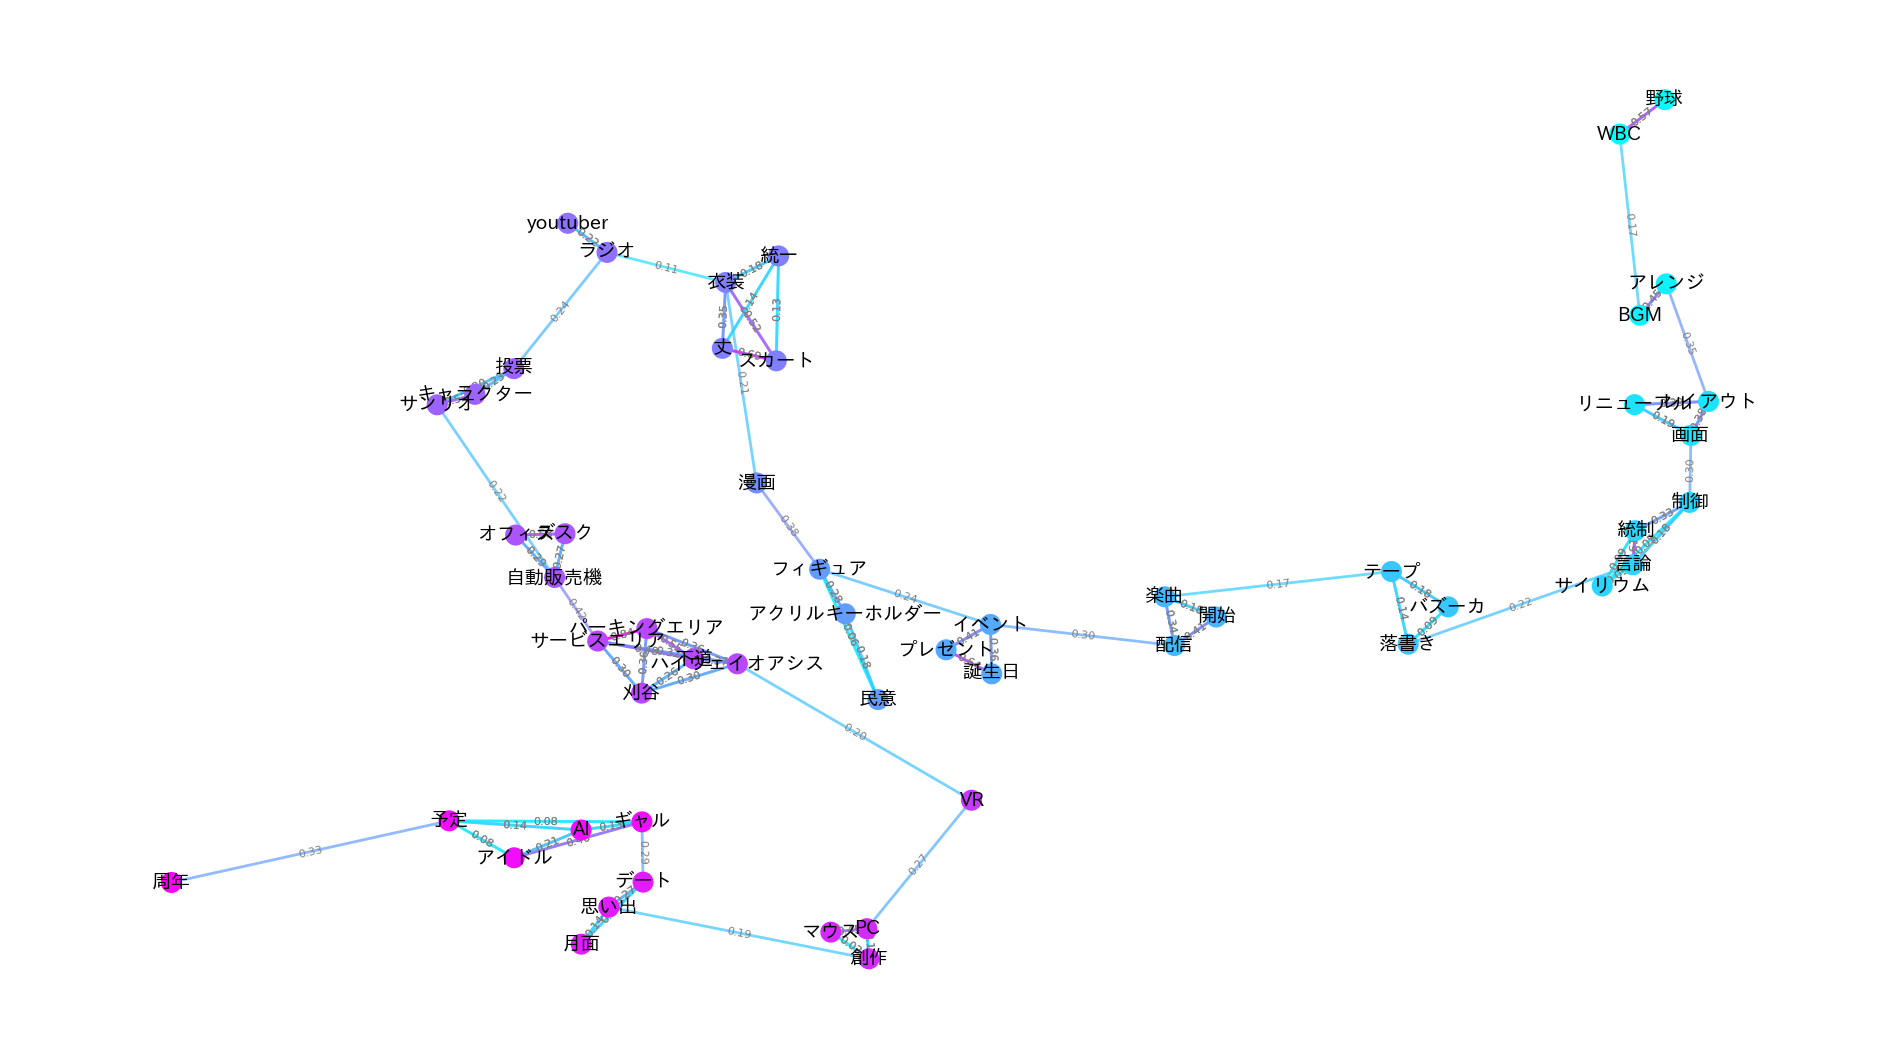

[(0.0, 1.0, 1.0, 1.0), (0.0, 1.0, 1.0, 1.0), (0.054901960784313725, 0.9450980392156862, 1.0, 1.0), (0.054901960784313725, 0.9450980392156862, 1.0, 1.0), (0.10980392156862745, 0.8901960784313725, 1.0, 1.0), (0.10980392156862745, 0.8901960784313725, 1.0, 1.0), (0.10980392156862745, 0.8901960784313725, 1.0, 1.0), (0.16470588235294117, 0.8352941176470589, 1.0, 1.0), (0.16470588235294117, 0.8352941176470589, 1.0, 1.0), (0.16470588235294117, 0.8352941176470589, 1.0, 1.0), (0.16470588235294117, 0.8352941176470589, 1.0, 1.0), (0.2196078431372549, 0.7803921568627451, 1.0, 1.0), (0.2196078431372549, 0.7803921568627451, 1.0, 1.0), (0.2196078431372549, 0.7803921568627451, 1.0, 1.0), (0.2784313725490196, 0.7215686274509804, 1.0, 1.0), (0.2784313725490196, 0.7215686274509804, 1.0, 1.0), (0.2784313725490196, 0.7215686274509804, 1.0, 1.0), (0.3333333333333333, 0.6666666666666667, 1.0, 1.0), (0.3333333333333333, 0.6666666666666667, 1.0, 1.0), (0.3333333333333333, 0.6666666666666667, 1.0, 1.0), (0.38823

In [111]:
# NetworkXのグラフオブジェクトを作成する
G = nx.DiGraph()

# グラフにノードを追加する
#for i in range(len(word_list)):
#   G.add_node(word_list[i])

i = 0
# 1行ごと
all_dict ={}
#node_colors = []
L = []
for row in words:
    i +=1
    my_dict = {}
    #print( str(i) + '行目')
    # 行の要素ごと
    j = 0
    for word in row:
        j += 1
        if word!='':
            G.add_node(word)
            if i != len(words):# 最後以外の行
                for word_same in row:
                    if word_same!='':
                        if word_same!=word:
                            G.add_edge(word, word_same, weight=wv.similarity(word,word_same))
                for word_next in words[i]:
                    if word_next!='':
                        # 相関値 計算
                        similarity_score = wv.similarity(word,word_next)
                        # 相関値 保存
                        my_dict[similarity_score] = (word,word_next)
                        all_dict[similarity_score] = (word,word_next)
                        # 相関値 表示
                        #print(word+' , '+word_next+' の相関： '+str(similarity_score))
            else:#最後の行
                print('last row')
            
    # 次の単語グループと一番相関のある単語ペア
    if i!= len(words):
        max_key = max(my_dict.keys())
        max_value = my_dict[max_key]
        print('**  一番強い相関は'+str(my_dict[max_key])+' で相関は '+str(max_key)+'  **')
        G.add_edge(my_dict[max_key][0], my_dict[max_key][1], weight=max_key)




        
#node_colors = [x / max(node_colors) for x in node_colors]


#for i in range(len(word_list)):
#    for j in range(i+1, len(word_list)):
#        if corr_matrix[i][j] != 0:
#            G.add_edge(word_list[i], word_list[j], weight=corr_matrix[i][j])

# ウェイトの最大値取得
#max_weight = max([edge[2]["weight"] for edge in G.edges(data=True)])
# カラーマップ生成
colmap = "cool"
cmap = plt.get_cmap(colmap)
#node_color_list = [cmap(color) for color in node_colors]
#node_color_list = 'red'
# 重みの最大値を取得する
max_weight = max([edge[2]["weight"] for edge in G.edges(data=True)])
edge_color_list = [cmap(edge[2]["weight"]/max_weight) for edge in G.edges(data=True)]

# グラフを描画する
plt.figure(figsize=(16*1.5, 9*1.5))
#pos = nx.spring_layout(G, weight='weight')
#pos = nx.spectral_layout(G, weight='weight')
#print(pos)
nx.draw_networkx_nodes(G, pos, node_size=200, node_color=node_color_list, cmap=plt.get_cmap(colmap) )
nx.draw_networkx_labels(G, pos, font_size=14, font_family="IPAexGothic")
#labels = nx.get_edge_attributes(G, "weight")
edges = G.edges(data=True)

nx.draw_networkx_edges(G, pos, edgelist=edges, edge_color=edge_color_list, width=2, alpha=0.7, arrows=False)
labels = {(u, v): format(d['weight'], '.2f') for u, v, d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels,font_color='gray', font_size=8,bbox=dict(facecolor='none',edgecolor='none', alpha=1))

plt.axis("off")
plt.savefig('near_edge.png')
plt.show()

print(node_color_list)

In [122]:
# 相関を計算する単語
ws = ['ニコニコ動画', 'ユーチューブ', 'ツイッター', 'ラーメン']

# 相関を計算
for i, w in enumerate(ws):
    for w_next in ws[i+1:]:
        similarity = wv.similarity(w, w_next)
        print(f"「{w}」と「{w_next}」の相関係数は {similarity:.3f}")

「ニコニコ動画」と「ユーチューブ」の相関係数は 0.664
「ニコニコ動画」と「ツイッター」の相関係数は 0.489
「ニコニコ動画」と「ラーメン」の相関係数は 0.127
「ユーチューブ」と「ツイッター」の相関係数は 0.445
「ユーチューブ」と「ラーメン」の相関係数は 0.088
「ツイッター」と「ラーメン」の相関係数は 0.142
